### 1. 
Historical intraday demand data can be used to study human behaviour and seasonality in activity. Download intraday 15-minute energy demand data from EirGrid for 2014 from: Canvas and save the data as a csv file with three columns for Date, Time and Demand. Note the null values in the spreadsheet. Load the EirGrid system demand data into your computer. Fix day-light saving issues and missing values using linear interpolation. Plot and carefully label the time series of energy demand during 2014.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import read_csv
import time, datetime

grid = read_csv(
    'EirGridSystemDemand2014.csv', header=0, encoding="latin1", na_values=['-'])

grid.interpolate(inplace=True)

d = grid.loc[:, 'Date'].tolist()
t = grid.loc[:, 'Time'].tolist()

N = len(t)

for i in range(N):
    if len(str(t[i])) < 5:
        t[i] = "0" + str(t[i])

pattern = "%m/%d/%Y:%H:%M"
epoch = []
for i in range(N):
    DT = "{}:{}".format(d[i], t[i])
    strp = time.strptime(DT, pattern)
    DT = time.strftime(pattern, strp)
    e = int(time.mktime(time.strptime(DT, pattern)))
    epoch.append(e)


In [2]:
for i in range(N):
    if i != 0:
        if (epoch[i] - epoch[i-1]) == -2700:    
            start = i
        elif (epoch[i] - epoch[i-1]) == 4500:    
            end = i

for i in range(start,end+1):
    epoch[i] = epoch[i] + 2700

dateTime = []
for i in range(N):
    DT = datetime.datetime.fromtimestamp(epoch[i]).strftime(pattern)
    dateTime.append(DT)

grid['Fixed_DateTime'] = pd.Series(dateTime, index=grid.index)

grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 4 columns):
Date              35040 non-null object
Time              35040 non-null object
Demand            35040 non-null float64
Fixed_DateTime    35040 non-null object
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ind = np.arange(N)

def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return grid["Date"][thisind]

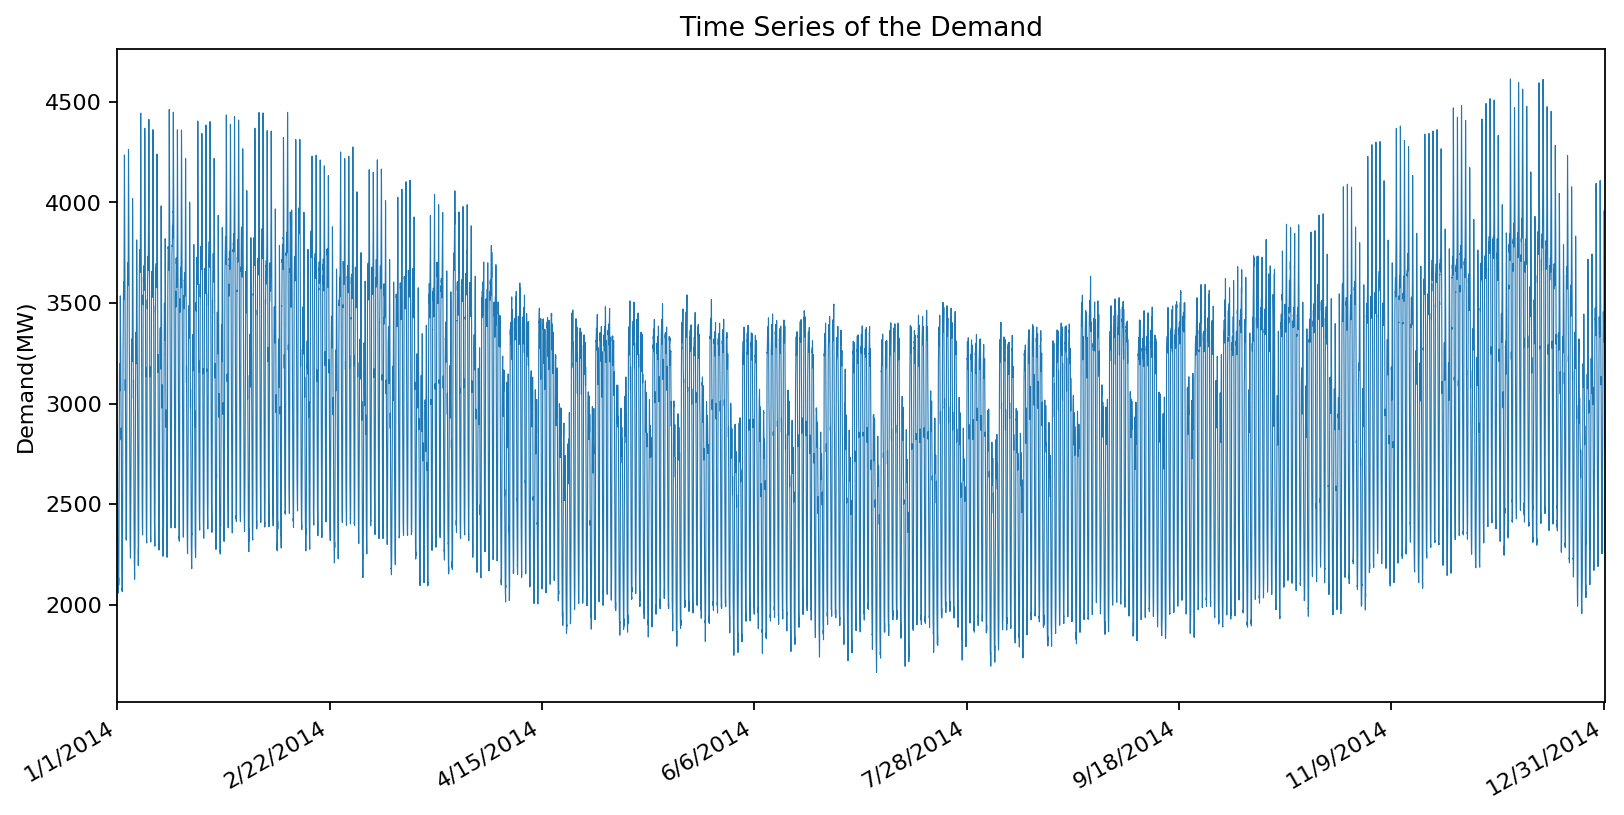

In [4]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
ax.plot(ind, grid["Demand"],linewidth=0.5)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))

ax.set_ylabel('Demand(MW)')
ax.set_title("Time Series of the Demand")
fig.autofmt_xdate()
plt.xlim((0,35041))
plt.show()

### 2. 
Estimate autocorrelation coefficients for 10 days and plot the autocorrelation against the lag with axis labelled in days. Comment on the shape of the plot.

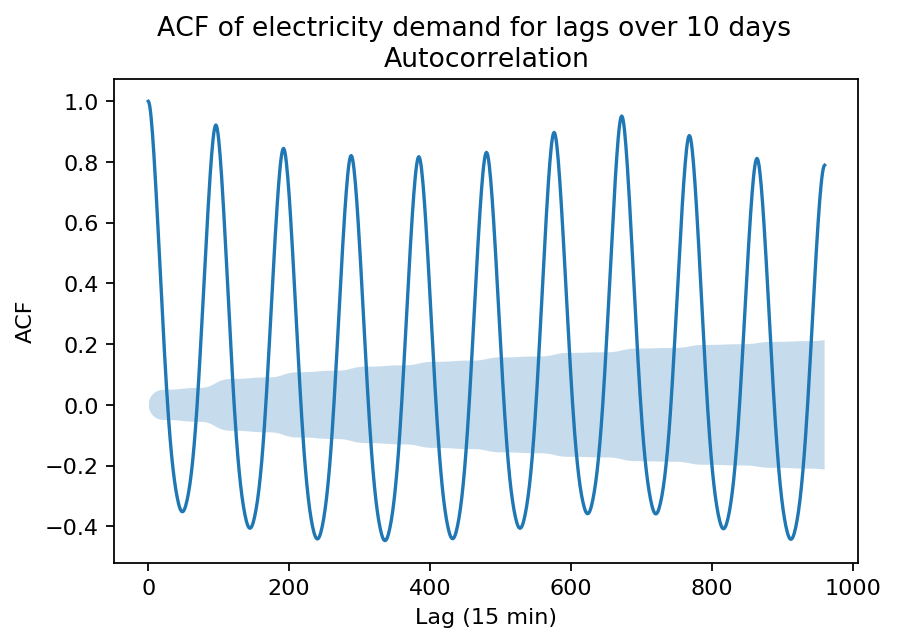

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings

warnings.filterwarnings('ignore')

### ACF
fig, ax = plt.subplots(figsize=(6,4),dpi=80)

ax.set_xlabel('Lag (15 min)')
ax.set_ylabel('ACF')

plotAcf = plot_acf(
    grid["Demand"],
    lags=4*24*10,
    alpha=0.05,
    ax=ax,
    use_vlines=False,
    markersize=0,
    linestyle='-')

fig.suptitle("ACF of electricity demand for lags over 10 days")
plt.show()

### 3. 
Create a time of year variable that ranges between 0 and 1 and show how the demand varies over the course of the year using a graphic.

In [6]:
toy = []
for i in range(N):
    toy.append((epoch[i]-epoch[0])/(epoch[-1]-epoch[0]))

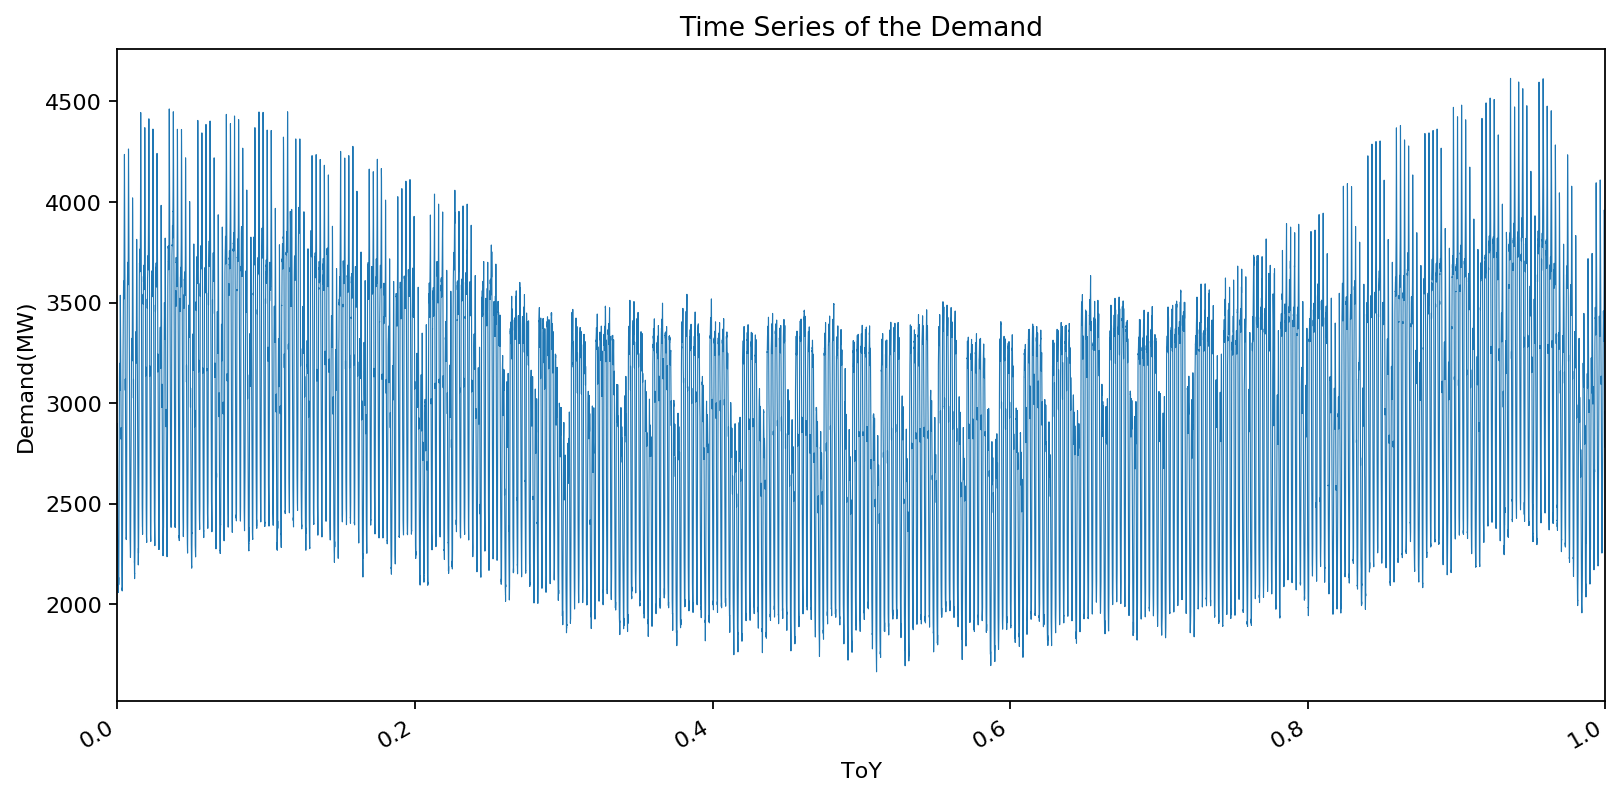

In [7]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
ax.plot(toy, grid["Demand"],linewidth=0.5)

ax.set_xlabel('ToY')
ax.set_ylabel('Demand(MW)')
ax.set_title("Time Series of the Demand")
fig.autofmt_xdate()
plt.xlim((0,1))
plt.show()

### 4. 
For each of the 12 months of the year, calculate the average demand and display as a bar chart and label appropriately.

In [8]:
m_avg = [0.0]*12
m_count = [0]*12
months = ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']

for i in range(N):
    d = datetime.datetime.fromtimestamp(epoch[i]).strftime('%m')
    m_avg[int(d)-1] += grid.Demand[i]
    m_count[int(d)-1] += 1
#     m_count[int(d)-1] += 1/(4*24)

for i in range(12):
    m_avg[i] = m_avg[i]/m_count[i]

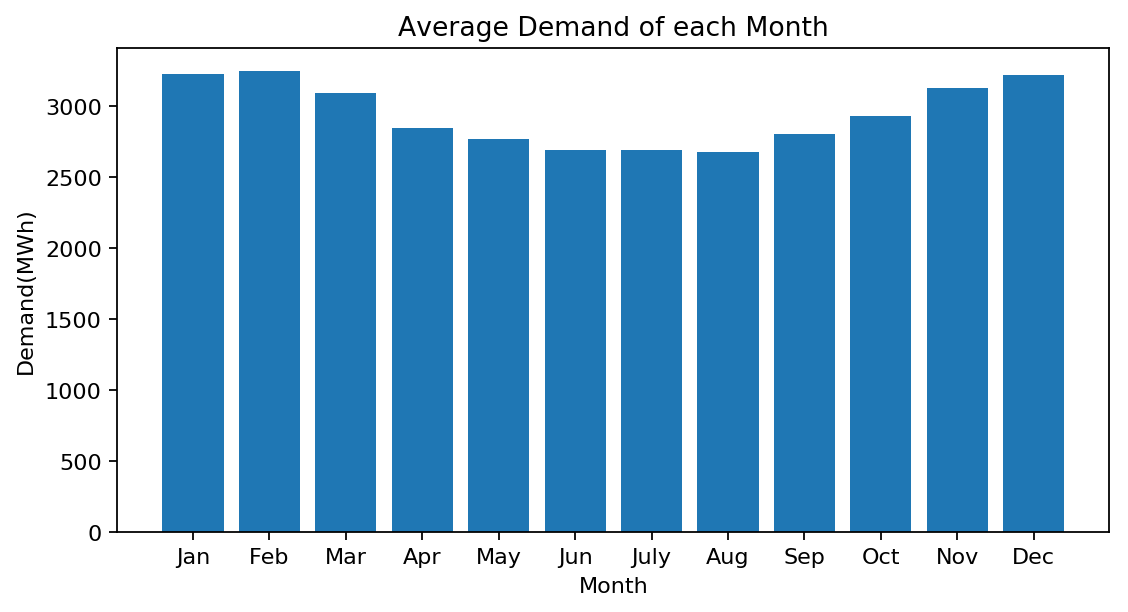

In [9]:
fig, ax = plt.subplots(figsize=(8,4),dpi=80)
plt.bar(months, m_avg)
plt.xlabel('Month')
plt.ylabel('Demand(MWh)')
plt.title('Average Demand of each Month')
plt.show()

### 5. 
For each of the 24 hours of the day, calculate the average demand and display as a bar chart, indicating the different hours of the day. This graphic is often referred to as the daily demand profile.

In [10]:
h_avg = [0.0]*24
h_count = [0]*24
hours = [i for i in range(24)]

for i in range(N):
    d = datetime.datetime.fromtimestamp(epoch[i]).strftime('%H')
    h_avg[int(d)] += grid.Demand[i]
    h_count[int(d)] += 1
#     h_count[int(d)] += 1/4

for i in range(24):
    h_avg[i] = h_avg[i]/h_count[i]

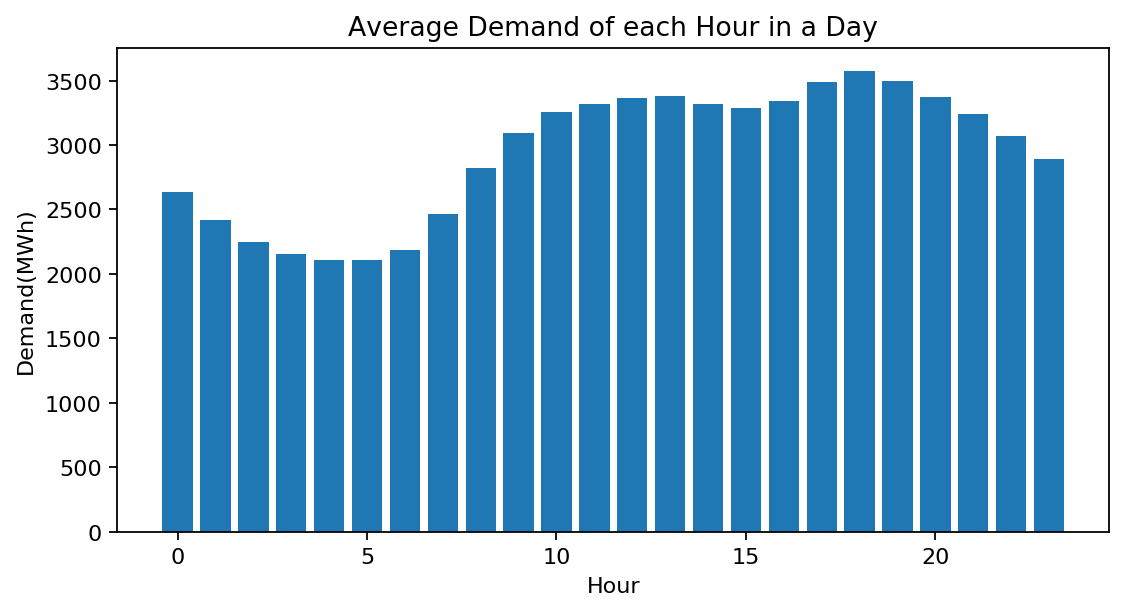

In [11]:
fig, ax = plt.subplots(figsize=(8,4),dpi=80)
plt.bar(hours, h_avg)
plt.xlabel('Hour')
plt.ylabel('Demand(MWh)')
plt.title('Average Demand of each Hour in a Day')
plt.show()

### 6. 
For each of the seven days of the week, calculate the average demand and display as a bar chart. Does the result make sense based on intuition about electricity consumption?

In [12]:
d_avg = [0.0]*7
d_count = [0]*7
Days = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

for i in range(N):
    d = datetime.datetime.fromtimestamp(epoch[i]).strftime('%w')
    d_avg[int(d)] += grid.Demand[i]
    d_count[int(d)] += 1
#     d_count[int(d)] += 1/(4*24)

for i in range(7):
    d_avg[i] = d_avg[i]/d_count[i]

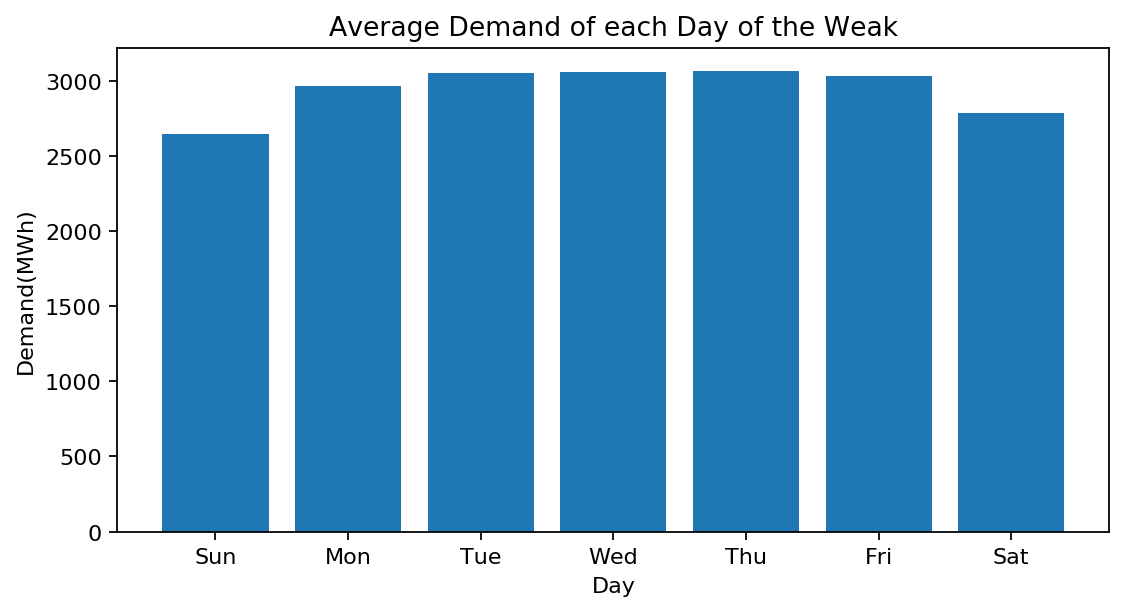

In [13]:
fig, ax = plt.subplots(figsize=(8,4),dpi=80)
plt.bar(Days, d_avg)
plt.xlabel('Day')
plt.ylabel('Demand(MWh)')
plt.title('Average Demand of each Day of the Weak')
plt.show()

### 7. 
Calculate a daily demand profile for each day of the week. This can be achieved by selecting a specific hour for each day and computing the average. Show the results on a graphic with a separate profile curve for each day.

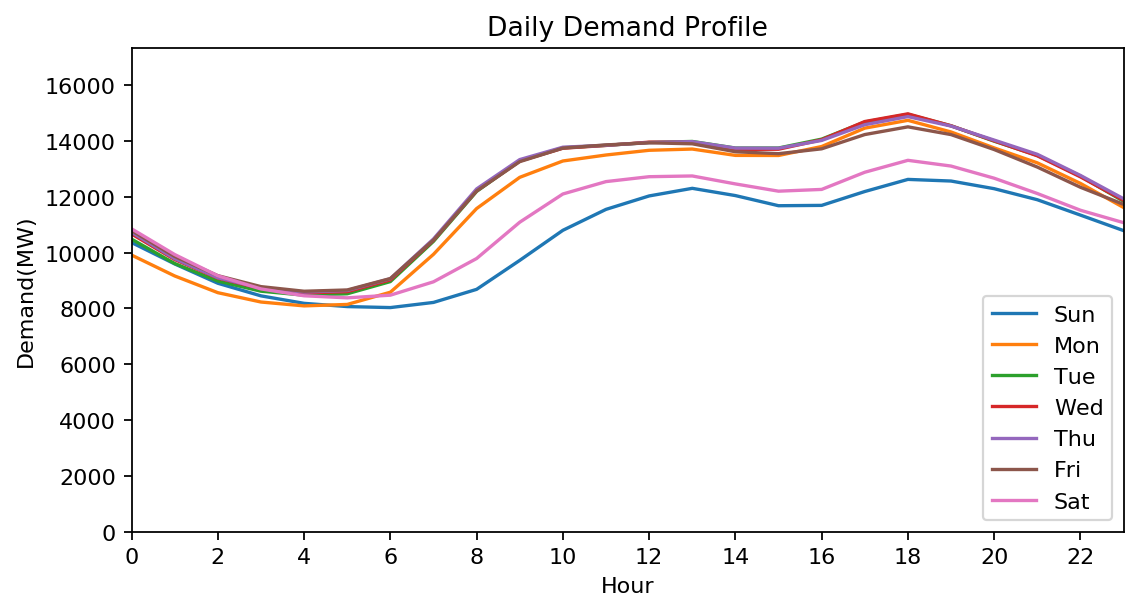

In [14]:
dh_avg = {}
dh_count = {}
for i in range(7):
    dh_avg[i] = [0.0]*24
    dh_count[i] = [0.0]*24

for i in range(N):
    d = datetime.datetime.fromtimestamp(epoch[i]).strftime('%w')
    h = datetime.datetime.fromtimestamp(epoch[i]).strftime('%H')
    dh_avg[int(d)][int(h)] += grid.Demand[i]
    dh_count[int(d)][int(h)] += 1/4

fig, ax = plt.subplots(figsize=(8,4),dpi=80)
for i in range(7):
    dh_avgtemp = [0.0]*24
    for j in range(24):
        dh_avgtemp[j] = float(dh_avg[i][j])/float(dh_count[i][j])
    ax.plot(hours, dh_avgtemp, label=Days[i])
    ax.set_xlabel('Hour')
    ax.set_ylabel('Demand(MW)')
    ax.set_title('Daily Demand Profile'.format(Days[i]))
plt.xticks(np.arange(0, 24, step=2))
plt.xlim((0,23))
plt.ylim((0,plt.ylim()[1]+2000))
ax.legend()
plt.show()

### 8. 
Is there a statistically significant difference between demand during the weekend (Saturday and Sunday) and during the working week (Monday through Friday)? Perform a statistical hypothesis test, such as a t-test, in order to reach a conclusion.

In [15]:
weekend = []
weekday = []
    
for i in range(0,N,4*24):
    d = int(datetime.datetime.fromtimestamp(epoch[i]).strftime('%w'))
    tmp = 0
    for j in range(4*24):
        tmp += grid.Demand[i+j]
    if d == 0 or d == 6:
        weekend.append(tmp)
    else:
        weekday.append(tmp)

weekend = np.array(weekend)
weekday = np.array(weekday)

In [16]:
from scipy import stats

t, p = stats.ttest_ind(weekend,weekday)
print("t = " + str(np.round(t,4)))
if np.round(2*p,4) == 0:
    print("p = 0.0000\t=> Reject null hypothesis of identical demand on weekdays and weekends at all confidence level")
else:
    if p < 0.05:
        s = "Reject null hypothesis of identical demand on weekdays and weekends with 95% coffidence level"
    else:
        s = ""
    print("p = {}\n=> {}".format(str(np.round(2*p,4)), s))

t = -11.4348
p = 0.0000	=> Reject null hypothesis of identical demand on weekdays and weekends at all confidence level


### 9. 
Divide the data into two halves and use the second half for evaluation purposes. Study the simple benchmark forecasting approach known as persistence. For data that does not change much from one time step to the next, we can assume that the most recent observations is a good forecast of the future. The forecast issued at time t for k periods ahead is simply given by y^(t+k|t) = y(t). Calculate the mean absolute error (MAE) and plot it against forecast horizon for lead times out to one day ahead.

In [17]:
from sklearn.metrics import mean_absolute_error

train = grid.loc[1:int(N/2),:]
test = grid.loc[int(N/2):N,:]


### persistence benchmark
perr = []
for i in range(1, 4*24+1):    
    l = mean_absolute_error(train.Demand[i:].values, train.Demand[:-i].values)
    perr.append(l)
    
### persistence benchmark
perr_test = []
for i in range(1, 4*24+1):
    l = mean_absolute_error(test.Demand[i:].values, test.Demand[:-i].values)
    perr_test.append(l)
    

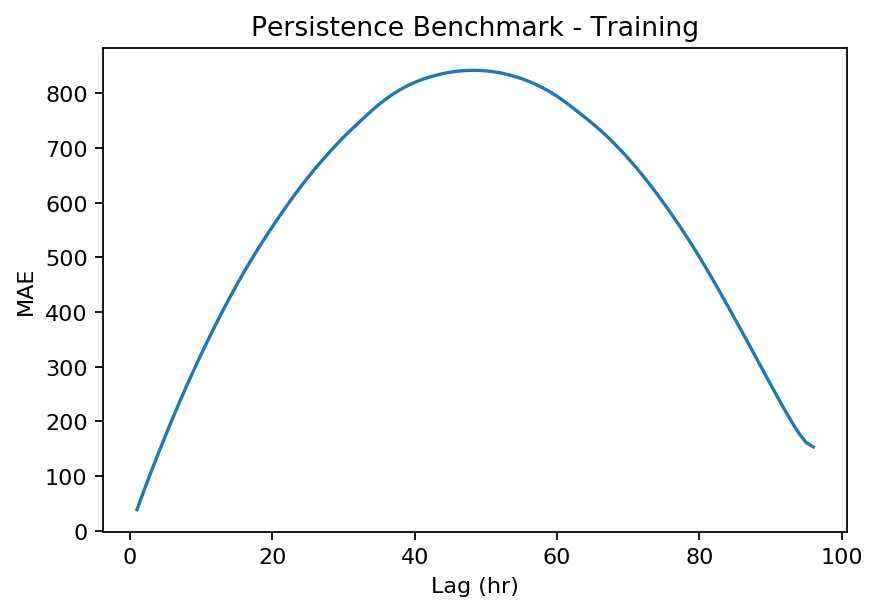

In [42]:
fig, ax = plt.subplots(dpi=80)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4),dpi=80)

# ax = axes[0]
ax.plot(range(1, 4*24+1), perr)

ax.set_xlabel('Lag (hr)')
ax.set_ylabel('MAE')

ax.set_title("Persistence Benchmark - Training")

# ax = axes[1]
# ax.plot(range(1, 4*24+1), perr_test)

# ax.set_xlabel('Lag (hr)')
# ax.set_ylabel('MAE')

# ax.set_title("Persistence Benchmark - Testing")

plt.show()

In [19]:
print(perr[0], perr_test[0])

38.67560933843256 39.70609053028141


### 10. 
Calculate the mean absolute percentage error for the persistence and plot this against the forecast horizon out to one day ahead. Discuss and explain the shapes of the curves showing performance against horizon.

In [20]:
def MAPE(Y, Y_):
    MAPE = 0.0
    for y, y_ in zip(Y,Y_):
        MAPE += abs(y_-y)/y
    MAPE /= len(Y)
    
    return MAPE

In [21]:
### persistence benchmark
perrMAPE = []
for i in range(1, 4*24+1):    
    l = MAPE(train.Demand[i:].values, train.Demand[:-i].values)
    perrMAPE.append(l)
    
### persistence benchmark
perrMAPE_test = []
for i in range(1, 4*24+1):
    l = MAPE(test.Demand[i:].values, test.Demand[:-i].values)
    perrMAPE_test.append(l)
    

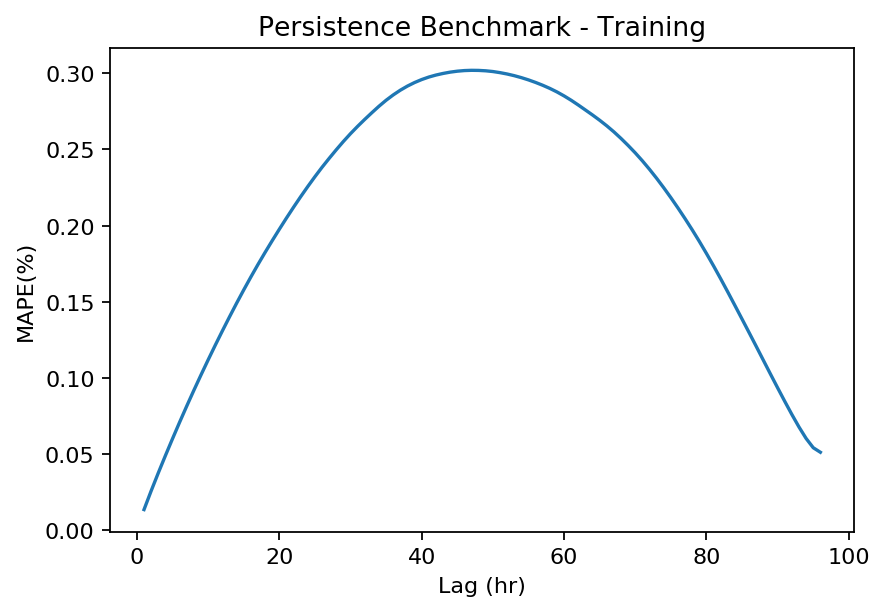

In [43]:
fig, ax= plt.subplots(dpi=80)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4),dpi=80)

# ax = axes[0]
ax.plot(range(1, 4*24+1), perrMAPE)

ax.set_xlabel('Lag (hr)')
ax.set_ylabel('MAPE(%)')

ax.set_title("Persistence Benchmark - Training")

# ax = axes[1]

# ax.plot(range(1, 4*24+1), perrMAPE_test)

# ax.set_xlabel('Lag (hr)')
# ax.set_ylabel('MAPE(%)')

# ax.set_title("Persistence Benchmark - Testing")

plt.show()

In [23]:
print(perrMAPE[0], perrMAPE_test[0])

0.013345440396352135 0.01401487084396546


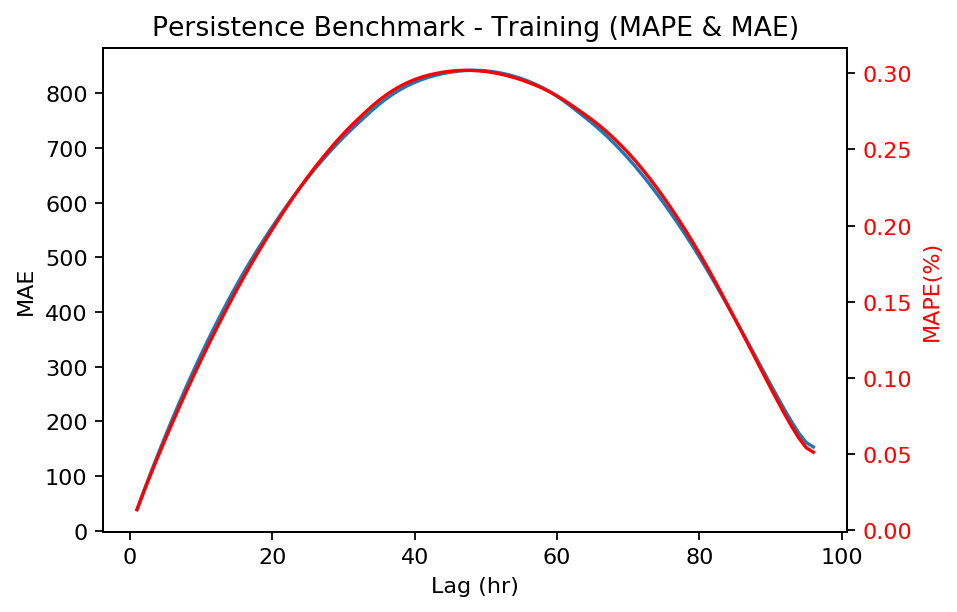

In [44]:
fig, ax= plt.subplots(dpi=80)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4),dpi=80)

# ax = axes[0]
# ax.plot(range(1, 4*24+1), perrMAPE)

# ax.set_xlabel('Lag (hr)')
# ax.set_ylabel('MAPE(%)')

# ax.set_title("Persistence Benchmark - Training")

# ax = axes[1]

ax.plot(range(1, 4*24+1), perr, label='MAE')

ax.set_xlabel('Lag (hr)')

ax.set_ylabel('MAE')

ax.set_title("Persistence Benchmark - Training (MAPE & MAE)")

ax2 = ax.twinx()
ax2.plot(range(1, 4*24+1), perrMAPE, label='MAPE', c='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.set_ylabel('MAPE(%)', color='red')

plt.show()